In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import datetime
from pandas.plotting import lag_plot

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import io


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['MSFT.csv']))


In [9]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-25,29.070000,29.650000,29.07,29.559999,24.071209,59231700
1,2012-01-26,29.610001,29.700001,29.40,29.500000,24.022350,49102800
2,2012-01-27,29.450001,29.530001,29.17,29.230000,23.802483,44187700
3,2012-01-30,28.969999,29.620001,28.83,29.610001,24.111927,51114800
4,2012-01-31,29.660000,29.700001,29.23,29.530001,24.046782,50572400


In [11]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]

predictions = []
N_test_observations = len(test_data)

In [12]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, predictions)
print('Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1.9076697321062412


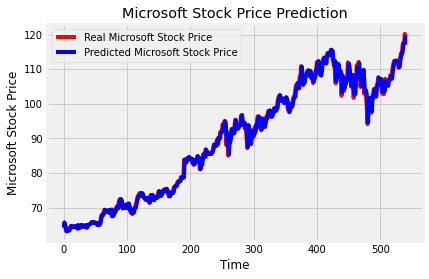

In [14]:
plt.plot(test_data, color='Red', label='Actual Microsoft Stock Price')
plt.plot(predictions, color='Blue', label='Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()